# I : Origins of Formal Structure

## 1. The Natural Numbers

In [1]:
from sympy import *

S.Naturals

Naturals

In [2]:
iter_N = iter(S.Naturals)
for n in range(0, 3):
    print(next(iter_N))

1
2
3


In [3]:
S.Naturals0

Naturals0

In [4]:
iter_N0 = iter(S.Naturals0)
for n in range(0, 3):
    print(next(iter_N0))

0
1
2


In [5]:
set_S = FiniteSet('A', 'B', 'C')
set_S

FiniteSet(A, B, C)

In [6]:
set_T = FiniteSet('U', 'V', 'W')
set_T

FiniteSet(U, V, W)

In [7]:
def get_cardinal(set_to_test):
    iter_N = iter(S.Naturals)
    for _ in set_to_test:
        count = next(iter_N)
    return count

In [8]:
get_cardinal(set_S)

3

In [9]:
get_cardinal(set_T)

3

In [10]:
def one_to_one_correspondence(set_to_test):
    iter_N = iter(S.Naturals)
    fnc = {}
    for element in set_to_test:
        fnc[next(iter_N)] = element
    return fnc

In [11]:
f = one_to_one_correspondence(set_S)
f

{1: A, 2: B, 3: C}

In [12]:
g = one_to_one_correspondence(set_T)
g

{1: U, 2: V, 3: W}

In [13]:
def inverse(function):
    keys = function.keys()
    vals = function.values()
    return dict(zip(vals, keys))

inverse(f)

{A: 1, B: 2, C: 3}

In [14]:
def composed_bijections(f, g):
    keys = f.keys()
    vals = g.values()
    return dict(zip(keys, vals))

composed = composed_bijections(inverse(f), g)
composed

{A: U, B: V, C: W}

In [15]:
get_cardinal(composed)

3

#### The Sum

In [16]:
set_T -= FiniteSet('W')

In [17]:
set_S_and_T = set_S + set_T
set_S_and_T

FiniteSet(A, B, C, U, V)

In [18]:
get_cardinal(set_S_and_T)

5

#### The Product

In [19]:
product_set = set_S * set_T
product_set

ProductSet(FiniteSet(A, B, C), FiniteSet(U, V))

In [20]:
get_cardinal(product_set)

6

In [21]:
set(product_set)

{(A, U), (A, V), (B, U), (B, V), (C, U), (C, V)}

#### The Exponential

In [22]:
exponential_set = set_T * set_T * set_T
exponential_set

ProductSet(ProductSet(FiniteSet(U, V), FiniteSet(U, V)), FiniteSet(U, V))

In [23]:
get_cardinal(exponential_set)

8

## 2. Infinite Sets

N = collection of natural numbers 0 to infinity contains many subsets; any subset of N is either finite or denumerable, such as:

- P = set of all positive natural numbers 1 to infinity.
- E = set of all even positive numbers.
- S = set of all positive multiples of 6.
- All finite subsets such as {0, 1, 2} or {2, 4, 16}

In [24]:
S.EmptySet

EmptySet

In [25]:
len(S.EmptySet)

0

In [26]:
FiniteSet(0, 1, 2).is_subset(S.Naturals0)

True

In [27]:
FiniteSet(1, 3, 5, 7).is_subset(S.Naturals0)

True

In [28]:
FiniteSet(2, 4, 16).is_subset(S.Naturals0)

True

In [29]:
S.Naturals.is_subset(S.Naturals0)

True

In [30]:
from sympy.abc import x

set_E = ConditionSet(x, Eq(x % 2, 0), S.Naturals)
set_E

ConditionSet(x, Eq(Mod(x, 2), 0), Naturals)

In [31]:
set_E.is_FiniteSet

False

In [32]:
set_E.is_subset(S.Naturals)

True

In [33]:
set_S2 = ConditionSet(x, Eq(x % 6, 0), S.Naturals)
set_S2

ConditionSet(x, Eq(Mod(x, 6), 0), Naturals)

In [34]:
set_S2.is_FiniteSet

False

In [35]:
set_S2.is_subset(S.Naturals)

True

#### Denumerables

A denumerable set X is a set where exists a bijection for the Natural numbers N to X.

Sets where a bijection exists have the same cardinal number:
- Finite: finite cardinals
- Denumerable: aleph-naught - ℵ₀

## 3. Permutations

In [80]:
from sympy.combinatorics.named_groups import SymmetricGroup
from sympy.combinatorics import Permutation

from sympy import init_printing
init_printing(perm_cyclic = False)

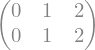

In [86]:
p = Permutation(2)
p

In [38]:
p.array_form

In [39]:
p.size

In [40]:
p.cardinality

In [41]:
factorial(-2)

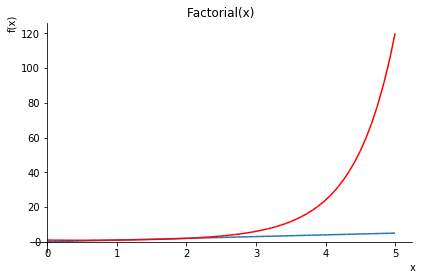

In [42]:
import math
from sympy.plotting import plot

p1 = plot(x, (x, 0, 5), show = False, title = "Factorial(x)")
p2 = plot(factorial(x), (x, 0, 5), show = False, line_color = "red")
p1.append(p2[0])
p1.show()

In [43]:
group = [1, 2, 3]
q = p
while q:
    print(q(group))
    q = q.next_lex()

[1, 2, 3]
[1, 3, 2]
[2, 1, 3]
[2, 3, 1]
[3, 1, 2]
[3, 2, 1]


In [44]:
q = p
while q:
    print(q.cyclic_form)
    q = q.next_lex()

[]
[[1, 2]]
[[0, 1]]
[[0, 1, 2]]
[[0, 2, 1]]
[[0, 2]]


In [45]:
q = p
while q:
    print(q.full_cyclic_form)
    q = q.next_lex()

[[0], [1], [2]]
[[0], [1, 2]]
[[0, 1], [2]]
[[0, 1, 2]]
[[0, 2, 1]]
[[0, 2], [1]]


In [46]:
q = p
q = q.next_lex()
{i: q(group)[i] for i in range(p.size)}

In [47]:
x1, x2, x3, x4 = symbols("x1, x2, x3, x4")
indeterminates = [x1, x2, x3, x4]
args = {x1: 1, x2: 2, x3: 3, x4: 4}

x = Permutation(len(indeterminates) - 1)

def expr1(lst):
    return (lst[0] + lst[1]) * (lst[2] + lst[3])

expr1(x(indeterminates))

In [48]:
factor_list(expr1(x(indeterminates)))

In [49]:
def calculate_poly(expression, args):
    pol = poly(expression)
    return pol.eval(args)

calculate_poly(expr1(x(indeterminates)), args)

In [50]:
from collections import Counter

def count_permutation_results(expr, args, perms, indeterminates):
    permutation = perms(indeterminates)
    original_result = calculate_poly(expr(permutation), args)
    results = []
    while perms:
        permutation = perms(indeterminates)
        result = calculate_poly(expr(permutation), args)
        if result == original_result:
            results.append("unchanged")
        else:
            results.append("changed")
        perms = perms.next_lex()
    return Counter(results)

count_permutation_results(expr1, args, x, indeterminates)

Counter({'unchanged': 8, 'changed': 16})

In [51]:
def expr2(lst):
    fctr_1 = lst[0] - lst[1]
    fctr_2 = lst[0] - lst[2]
    fctr_3 = lst[0] - lst[3]
    fctr_4 = lst[1] - lst[2]
    fctr_5 = lst[1] - lst[3]
    fctr_6 = lst[2] - lst[3]
    return  fctr_1 * fctr_2 * fctr_3 * fctr_4 * fctr_5 * fctr_6

expr2(x(indeterminates))

In [52]:
count_permutation_results(expr2, args, x, indeterminates)

Counter({'unchanged': 12, 'changed': 12})

In [53]:
def expr3(lst):
    return (lst[0] - lst[1]) * (lst[2] - lst[3])

expr3(x(indeterminates))

In [54]:
count_permutation_results(expr3, args, x, indeterminates)

Counter({'unchanged': 4, 'changed': 20})

In [55]:
from sympy.combinatorics.perm_groups import PermutationGroup

def get_permutation_groups(expr, args, perms, indeterminates):
    permutation = perms(indeterminates)
    original_result = calculate_poly(expr(permutation), args)
    changed = []
    unchanged = []
    while perms:
        permutation = perms(indeterminates)
        result = calculate_poly(expr(permutation), args)
        if result == original_result:
            unchanged.append(perms)
        else:
            changed.append(perms)
        perms = perms.next_lex()
    changed_group = PermutationGroup(changed)
    unchanged_group = PermutationGroup(unchanged)
    return changed_group, unchanged_group 

changed, unchanged = get_permutation_groups(expr3, args, x, indeterminates)

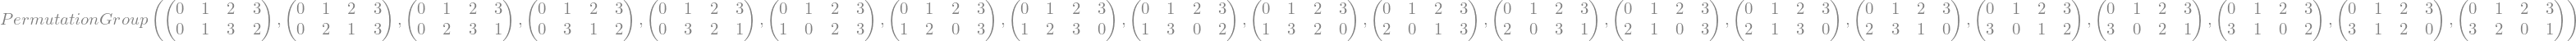

In [56]:
changed

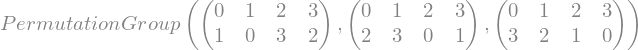

In [87]:
unchanged # this is also known as the 4 group

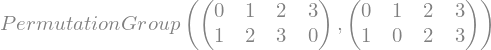

In [96]:
sym_group = SymmetricGroup(4)
sym_group

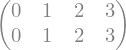

In [58]:
unchanged.identity

## 4: Time and Order

In [62]:
# Times in order
t = 0
tPrime = t + 1
tPrimePrime = tPrime + 1

def transitiveLaw(a, b, c):
    return a < b and b < c and a < c

def lawOfTrichotomy(a, b):
    return a < b or a == b or b < a

print(transitiveLaw(t, tPrime, tPrimePrime))
print(lawOfTrichotomy(t, tPrime))

True
True


In [63]:
X = {1, 2, 3, 4, 5, 6}

def binaryRelationLessThan(x, y):
    return x < y

def linearlyOrderedSet(anySet):
    
    anySet = list(anySet)
    truthValues = []
    
    for i in range(0, len(anySet)-1):
        x = anySet[i]
        y = anySet[i+1]
        truthValues.append(binaryRelationLessThan(x, y))
        truthValues.append(lawOfTrichotomy(x, y))
    
    for i in range(0, len(anySet)-2):
        x = anySet[i]
        y = anySet[i+1]
        z = anySet[i+2]
        truthValues.append(transitiveLaw(x, y, z))
    
    return all(truthValues)

print("Linear ordered set " + str(X) + ": " + str(linearlyOrderedSet(X)))

Linear ordered set {1, 2, 3, 4, 5, 6}: True


In [64]:
def binaryRelationNotLaterThan(x, y):
    return x <= y

def transitiveNotLaterThan(x, y, z):
    return x <= y and y <= z and x <= z

def reflexive(x):
    return binaryRelationNotLaterThan(x, x)

def antisymmetric(x, y):
    return x <= y and y <= x or x != y

def trichotomyNotLaterThan(X):
    truthValues = []
    X = list(X)
    for i in range(0, len(X)-1):
        x = X[i]
        y = X[i+1]
        truthValues.append(
            binaryRelationNotLaterThan(x, y) or binaryRelationNotLaterThan(y, x)
        )
    return all(truthValues)

def linearlyOrderedNotLaterThan(anySet):
    
    anySet = list(anySet)
    truthValues = []
    
    truthValues = [trichotomyNotLaterThan(anySet)]
    
    for x in anySet:
        truthValues.append(reflexive(x))
        
    for i in range(0, len(anySet)-1):
        x = anySet[i]
        y = anySet[i+1]
        truthValues.append(binaryRelationNotLaterThan(x, y))
        truthValues.append(antisymmetric(x, y))
    
    for i in range(0, len(anySet)-2):
        x = anySet[i]
        y = anySet[i+1]
        z = anySet[i+2]
        truthValues.append(transitiveNotLaterThan(x, y, z))
    
    return all(truthValues)

print("X not later than: " + str(linearlyOrderedNotLaterThan(X)))

X not later than: True


In [65]:
def orderIsomorphism(X, Y):
    if (linearlyOrderedSet(X) and linearlyOrderedSet(Y)):
        return set(zip(X, Y))
    
X = {1, 2, 3}
Y = {2, 4, 6}
print("Order isomorphism X → Y : " + str(orderIsomorphism(X, Y)))

Z = [0, 0, 0]
print("Order isomorphism X → Z : " + str(orderIsomorphism(X, Z)))

Order isomorphism X → Y : {(1, 2), (2, 4), (3, 6)}
Order isomorphism X → Z : None


X and Y are of the same *order type*

In [66]:
from math import pi

approximationsOfPi = [3.14, 3.141, 3.1415, 3.14159, 3.141592]
X = list(approximationsOfPi)
S = list(approximationsOfPi)[:2]

def upperBound(S, b):
    return(all([s <= b for s in S]))

def leastUpperBound(S, b, bPrime):
    return upperBound(S, b) and upperBound(S, bPrime) and b < bPrime

print("Upper bound: " + str(upperBound(S, X[3])))
print("Upper bound with π: " + str(upperBound(X, pi)))
print("Least upper bound: " + str(leastUpperBound(S, X[3], X[4])))

Upper bound: True
Upper bound with π: True
Least upper bound: True


An unbounded set is one which has no upper or lower bound: so the set of Natural numbers is not unbounded because it has a lower bound of 0.

**Q** = set of rational numbers
**R** = set of real numbers

**R** is:
- complete (every subset has a least upper bound)
- unbounded (-∞ to +∞)
- has a denumerable dense subset (**Q** can approximate every number in **R**)

Any set with the above properties is order isomorphic to **R**

In [67]:
# Intervals of time can be summed like natural numbers
print((t + tPrime) + tPrimePrime == t + (tPrime + tPrimePrime))

True


## 5: Space and Motion

The idea of space, measured with distances, requires not rational numbers but real numbers; this is simply revealed through the distance of the long length of an isosceles right triangle with legs of length 1:

In [68]:
from math import sqrt

hypotheseOfRightTriangle = sqrt(2)
print(hypotheseOfRightTriangle)
print(hypotheseOfRightTriangle == sqrt(1**2 + 1**2))

1.4142135623730951
True


Here we arrive at the real numbers.

In [69]:
def distance(p, q):
    """ Distances as difference between points. """
    return abs(q - p)

print("Axiom 1: " + str(distance(1, 2) == distance(2, 1)))

p = 1
q = 1
print("Axiom 2: " + str(distance(p, q) == 0 and p == q))

Axiom 1: True
Axiom 2: True


In [70]:
def triangleAxiom(p, q, r):
    """ Distance is always longer or equivalent if through point r. """
    return distance(p, q) <= distance(p, r) + distance(r, q)

print("Axiom 3: " + str(triangleAxiom(1, 3, 2)))

Axiom 3: True


From the 3 axioms above arise the concept of *metric space*.

In [71]:
def figure(*points):
    """ Creates a 'figure' as a collection of points. """
    return (points)

fig = figure(1, 2)

def rigidMotion(fig, distance):
    """ Moves all points in a figure by a rigid distance. """
    return figure(*[x+distance for x in fig])

print(distance(*fig) == distance(*rigidMotion(fig, 3)))

True


Rigid motion is a bijection of space which preserves distances between points.

In [72]:
def compositeMotion(fig, d1, d2):
    """ Allows the composition of multiple motions. """
    for x in (d1, d2):
        fig = rigidMotion(fig, x)
    return fig

print(compositeMotion(fig, 1, 2))

(4, 5)


The composite motion can be seen in the formula:

    C = N⋅M

## 6: Symmetry

A definition of symmetry of a figure *F*:

    a rigid motion of *F* onto itself

There are 4 rigid motion symmetries in metric space:

- vertical
- horizontal
- rotational
- identity

These permutations are the same as allowed by permutation of the algebraic polynomial:

    (x1 - x2)(x3 - x4)
    
This suggests that there is an underlying abstract structure for this 'four group'.

There are other symmetries:

- those existing for 3d objects
- further symmetrical figures in the plane (squares, triangles, etc.)
- frieze symmetries on infinitely extending rectangles (7 types)
- wallpaper patterns (17 types)
- crystallographic groups in 3 dimensions

## 7: Transformation Groups

*Transformations*:

- a permutation of a set
- a symmetry of a figure
- a motion of Euclidean space

In [73]:
def bijection(X, T):
    """ Bijection of X with transformation T. """
    return [T(x) for x in X]

def transformation(X, T):
    """ Transformation is a bijection. """
    return bijection(X, T)

def transformationGroup(X, G):
    """ Applies each Transformation to X. """
    for T in G:
        X = transformation(X, T)
    return X

X = [1, 2, 3, 4]
T1 = lambda x : x * 2
T2 = lambda x : x ** 2
T3 = lambda x : x // 2
G = [T1, T2, T3]

print(transformationGroup(X, G))

[2, 8, 18, 32]


Other types of groups:

- permutation group: transformation group on a finite set
- symmetric group: the group of all degree n! permutations of a group)

In [74]:
def label(X):
    """ Labels the parts of a set. """
    labels = [x for x in range(1, len(X)+1)]
    X = dict(zip(X, labels))
    return X

def permuteFunction(X):
    """ Permute the values in a permutation. """
    labels = list(X.values())
    labels.reverse()
    X = dict(zip(X.keys(), labels))
    return X

def readLabels(X):
    """ Extract the labels from a labelled set. """
    labels = [*X.values()]
    return labels

X = ['a', 'b', 'c', 'd']
print("Hypothetical list of vertexes: " + str(X))
X = label(X)
print("Labelled list of vertexes: " + str(X))
X = permuteFunction(X)
print("Transformed shape: " + str(X))
X = readLabels(X)
print("Labels read back after tranformation: " + str(X))

Hypothetical list of vertexes: ['a', 'b', 'c', 'd']
Labelled list of vertexes: {'a': 1, 'b': 2, 'c': 3, 'd': 4}
Transformed shape: {'a': 4, 'b': 3, 'c': 2, 'd': 1}
Labels read back after tranformation: [4, 3, 2, 1]


The above shows a generalization of the fact that permutations of a typical set represents the permutations of any other set of equal size; the process is related to the bijection of a set to cardinal numbers and then a comparison against another similarly sized set.

In [75]:
def permuteCorrespondence(X):
    """ Permutes the set X. """
    X.reverse()
    return X

Y = [1, 2, 3, 4]
print("Y is: " + str(Y))
permutedY = permuteCorrespondence(Y)
print("Permuted Y is: " + str(permutedY))

print(permutedY == readLabels(permuteFunction(label(X))))

Y is: [1, 2, 3, 4]
Permuted Y is: [4, 3, 2, 1]
True


## 8: Groups

A group *G* has 3 rules:

- element *st* from *r*, *s*, *t* in *G* is an associative product
- element *e* of *G* is such that *te* = *t*
- element *t* has an inverse such that *t* x *tInverse* = *e*

In [76]:
from math import log, log10

x = 5
y = 11

# The logs below should be equal but are slightly out; must be a Python bug
print(log10(x*y))
print(log10(x) + log10(y))
print(log10(x*y) == log10(x) + log10(y))

print(log(1))

inverseLog = log(x**-1)
print(inverseLog)
print(log(x))
print(inverseLog == -log(x))

1.7403626894942439
1.7403626894942437
False
0.0
-1.6094379124341003
1.6094379124341003
True


## 9: Boolean Algebra

In [77]:
S = set(['v', 'w', 'x'])
T = set(['x', 'y', 'z'])

# Intersection
print(('x' in (S and T)) == ('x' in S and 'x' in T))

# Union
print(('x' in (S or T)) == ('x' in S or 'x' in T))

# If Then
print(('x' in S and 'x' in T) == ('x' in T or (not 'x' in S)))

# Complement
print(('x' not in S) == (not ('x' in S)))

True
True
True
True


In [78]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
%matplotlib inline

venn2([S, T])
plt.show()

ModuleNotFoundError: No module named 'matplotlib_venn'

In [ ]:
S = set(['a', 'b', 'c'])
T = set(['a', 'b', 'c'])
X = S and T

# Equality of subsets
print((S == T) == (all([x in S and x in T for x in X])))

S = set(['b', 'c'])
T = set(['a', 'b', 'c'])
X = S and T

# Inclusion of subsets
print((S.issubset(T)) == (all([x in T for x in S])))

## 10: Calculus, Continuity, and Topology

In [ ]:
from math import sin, tan

# Fix this:
def isContinuousFunction(func, a, x, delta):
    """ Checks whether a function is continuous.
    
    a = any point
    x = an element in the series of real numbers
    """
    epsilon = abs(func(a + delta))
    if epsilon > 0:
        if delta > 0:
            if abs(x - a) < delta:
                return abs(func(x) - func(a)) < epsilon
            else:
                return "Delta is too low"
        else:
            return "Delta less than zero"
    else:
        return "Epsilon less than zero"

print("Wrong: " + str(isContinuousFunction(sin, 3, 5, 3)))
print(isContinuousFunction(tan, 3, 5, 3))

In [ ]:
def isOpenInterval(a, x, b):
    """ Tests whether x is within an open interval a -> b"""
    return a < x < b

print(isOpenInterval(1, 2, 3))
print(isOpenInterval(1, 2, 2))

## 11: Human Activity & Ideas

Activity    | Idea | Formulation 
------------|------|-------------
Collecting | Collection | Set (of elements)
Counting   | Next | Sucessor; order
-          | -    | Ordinal number
Comparing  | Enumeration | Bijection
-          | -           | Cardinal number
Computing  | Combination (of nos) | Rules for addition
- | - | Rules for multiplication
- | - | Abelian group
Rearranging | Permutation | Bijection
-           | -           | Permutation group
Timing     | Before and after | Linear order
Observing  | Symmetry | Transformation group
Building   | Figure; symmetry | Collection of points
Measuring  | Distance; extent | Metric space
Moving     | Change | Rigid motion
-          | -      | Transformation group
-          | -      | Rate of change
Estimating | Approximation | Continuity
-          | -             | Limit
-          | Nearby | Topological space
Selecting  | Part | Subset
-          | -    | Boolean algebra
Arguing    | Proof | Logical connectives
Choosing   | Chance | Probability (favorable/total)
Successive actions | Followed by | Composition
-          | -      | Transformation group

## 12: Mathematical Activities

Following is a list of varieties of processes which may generate new ideas and new notions within Mathematics:

- Conundrums: finding the solution of hard problems
- Completion: a new structure emerges from operations on another: eg. natural numbres -> integers through subtraction
- Invariance: the need to explain common structures that arise from different problems
- Common Structure (Analogy): eg. symmetry group as commonality of 2 different symmetrical figures.
- Intrinsic Structure: a hidden formal structure sometimes explains a fact: eg. permuation group on *n* letters always has order dividing *n*!.
- Generalization: concrete instances to general laws (2+3=5 & 3+2=5 to x+y == y+x; or extensions of rules (from 2d / 3d geometry to *n*d
- Abstraction: keeping a structure and its operations, without the original elements, and formulating the operations as axioms & consequences; eg. from transformation groups to abstract groups
- Axiomatization: reduce a list of theorums on a given topic to a shorter list.
- Analysis of Proof: finding axioms by searching for the minimum number of properties for a given proof or proofs.

## 13: Axiomatic Structure

Following chapters indicate how axioms can describe the 3 structures:
    
    - number; natural number axioms
    - space; the Euclidean plane axioms
    - time; the real line 
    
These structures are considered *categorical*.